# Master Data Science, Big Data & Business Analytics 
### Programación Python Avanzado - PRÁCTICA
##### NORMA NOELIA FRANCISCO DE MOYA

#### 1. Librerías necesarias.

In [28]:
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Inicializar variables.

In [29]:
hostnames = []
dataset = []
df = None 

#### 3. Función para generar los hostnames.

In [30]:
def set_hostnames (number_of_hosts: int) -> None:
    operating_system = ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10 
    environments = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30 
    countries = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    group_alpha = []

    for i in range (number_of_hosts):
        country = random.choice (countries)
        hostname = random.choice (operating_system) + random.choice(environments)
        hostname += country
        group_alpha.append (hostname)
        hostname += str(group_alpha.count (hostname)).zfill (3)
        hostnames.append (hostname) 

#### 4. Función para obtener el nombre del SO.

In [31]:
def get_os (hostname: str) -> str:
    if hostname.startswith ('L'):
        return 'LINUX'
    elif hostname.startswith ('S'):
        return 'SOLARIS'
    elif hostname.startswith ('A'):
        return 'AIX'
    elif hostname.startswith ('H'):
        return 'HP-UX'
    else:
        return 'Unknow'

#### 5. Función para obtener el nombre del entorno. 

In [32]:
def get_enviroment (hostname: str) -> str: 
    if hostname [1] == 'D':
        return 'Development'
    elif hostname [1] == 'I':
        return 'Integration'
    elif hostname [1] == 'T':
        return 'Testing'
    elif hostname [1] == 'S':
        return 'Staging'
    elif hostname [1] == 'P':
        return 'Production'
    else:
        'Unknow'

#### 6. Función para obtener el nombre del país.

In [33]:
def get_contry (hostname: str) -> str:
    if hostname [2:5] == 'NOR':
        return 'Norway'
    elif hostname [2:5] == 'DEU':
        return 'Germany'
    elif hostname [2:5] == 'ITA':
        return 'Italy'
    elif hostname [2:5] == 'ESP':
        return 'Spain'
    elif hostname [2:5] == 'IRL':
        return 'Ireland'
    elif hostname [2:5] == 'FRA':
        return 'France'
    else:
        return 'Unknow'

#### 7. Función para generar el DataFrame. 

In [34]:
def set_dataframe (count: int) -> None: 
    global df 
    
    set_hostnames(count)
    for hostname in hostnames:
        dataset.append ({
            'hostname': hostname,
            'os': get_os (hostname),
            'enviroment': get_enviroment (hostname),
            'country': get_contry (hostname),
            'node': int (hostname [-3:])
        })
    df = pd.DataFrame(dataset)

#### 8. Crear el DataFrame.

In [35]:
set_dataframe(1500)
df

,hostname,os,enviroment,country,node
0,LTIRL001,LINUX,Testing,Ireland,1
1,APIRL001,AIX,Production,Ireland,1
2,STDEU001,SOLARIS,Testing,Germany,1
3,SPIRL001,SOLARIS,Production,Ireland,1
4,HDITA001,HP-UX,Development,Italy,1
...,...,...,...,...,...
1495,ASIRL022,AIX,Staging,Ireland,22
1496,STNOR009,SOLARIS,Testing,Norway,9
1497,AIIRL008,AIX,Integration,Ireland,8
1498,ASIRL023,AIX,Staging,Ireland,23


#### 9. Guardar el DataFrame generado en un fichero CSV.

In [36]:
df.to_csv('data/hosts.csv', header=True, index=False)
hosts_df = pd.read_csv('data/hosts.csv')
print(hosts_df)

      hostname       os   enviroment  country  node
0     LTIRL001    LINUX      Testing  Ireland     1
1     APIRL001      AIX   Production  Ireland     1
2     STDEU001  SOLARIS      Testing  Germany     1
3     SPIRL001  SOLARIS   Production  Ireland     1
4     HDITA001    HP-UX  Development    Italy     1
...        ...      ...          ...      ...   ...
1495  ASIRL022      AIX      Staging  Ireland    22
1496  STNOR009  SOLARIS      Testing   Norway     9
1497  AIIRL008      AIX  Integration  Ireland     8
1498  ASIRL023      AIX      Staging  Ireland    23
1499  LTESP026    LINUX      Testing    Spain    26

[1500 rows x 5 columns]


#### 10. Generar un único gráfico, agrupando para cada país (country) los entornos (enviroment).

##### Datos para el gráfico

In [37]:
country_and_enviroment = df
country_and_enviroment.groupby(['country', 'enviroment']).size()

country  enviroment 
France   Development     13
         Integration     13
         Production      41
         Staging         22
         Testing         30
Germany  Development     35
         Integration     38
         Production     105
         Staging         86
         Testing         84
Ireland  Development     45
         Integration     46
         Production     147
         Staging        120
         Testing        112
Italy    Development     23
         Integration     23
         Production      61
         Staging         50
         Testing         49
Norway   Development     13
         Integration     13
         Production      33
         Staging         19
         Testing         22
Spain    Development     25
         Integration     20
         Production      71
         Staging         70
         Testing         71
dtype: int64

In [38]:
country_and_enviroment_graphic= country_and_enviroment.groupby(['country', 'enviroment']).size().head(100)
country_and_enviroment_graphic.unstack()

enviroment,Development,Integration,Production,Staging,Testing
country,,,,,
France,13,13,41,22,30
Germany,35,38,105,86,84
Ireland,45,46,147,120,112
Italy,23,23,61,50,49
Norway,13,13,33,19,22
Spain,25,20,71,70,71


##### Gráfico 

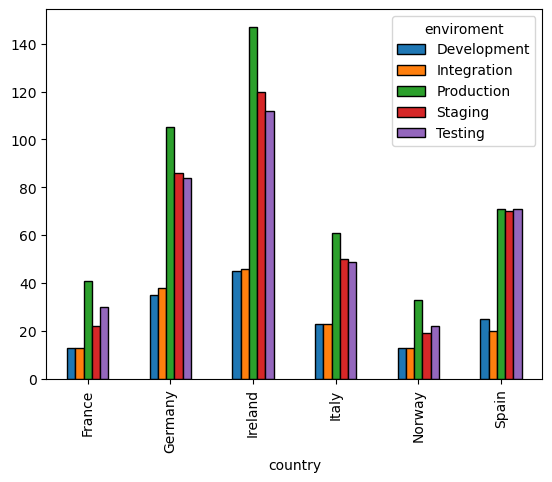

In [39]:
country_and_enviroment_graphic.unstack ().plot(kind = 'bar', edgecolor='black');

#### 11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas.

##### Datos para los gráficos

In [40]:
#Gráfico_1 
type_of_OS_grouped_by_country = df
type_of_OS_grouped_by_country.groupby(['country', 'os']).size()
type_of_OS_grouped_by_country_graphic = type_of_OS_grouped_by_country.groupby(['country', 'os']).size()
type_of_OS_grouped_by_country_graphic.unstack 

<bound method Series.unstack of country  os     
France   AIX         27
         HP-UX        8
         LINUX       46
         SOLARIS     38
Germany  AIX         66
         HP-UX       33
         LINUX      151
         SOLARIS     98
Ireland  AIX         84
         HP-UX       60
         LINUX      198
         SOLARIS    128
Italy    AIX         29
         HP-UX       22
         LINUX       89
         SOLARIS     66
Norway   AIX         24
         HP-UX        8
         LINUX       40
         SOLARIS     28
Spain    AIX         50
         HP-UX       30
         LINUX      106
         SOLARIS     71
dtype: int64>

In [41]:
#Gráfico_2
total_operating_systems = df 
total_operating_systems.groupby(['os']).size()
total_operating_systems_graphic = total_operating_systems.groupby(['os']).size()
total_operating_systems_graphic

os
AIX        280
HP-UX      161
LINUX      630
SOLARIS    429
dtype: int64

In [42]:
##Gráfico_3 
total_hosts_by_country = df
total_hosts_by_country['country'].value_counts ()
total_hosts_by_country_graphic = total_hosts_by_country['country'].value_counts ()
total_hosts_by_country_graphic

country
Ireland    470
Germany    348
Spain      257
Italy      206
France     119
Norway     100
Name: count, dtype: int64

In [43]:
##Gráfico_4 
hosts_by_country_grouped_by_enviroment = df 
hosts_by_country_grouped_by_enviroment.groupby (['country' , 'enviroment']).size().unstack(0)
hosts_by_country_grouped_by_enviroment_graphic = hosts_by_country_grouped_by_enviroment.groupby (['country' , 'enviroment']).size().unstack(0)
hosts_by_country_grouped_by_enviroment_graphic

country,France,Germany,Ireland,Italy,Norway,Spain
enviroment,,,,,,
Development,13,35,45,23,13,25
Integration,13,38,46,23,13,20
Production,41,105,147,61,33,71
Staging,22,86,120,50,19,70
Testing,30,84,112,49,22,71


##### Malla - Gráficos

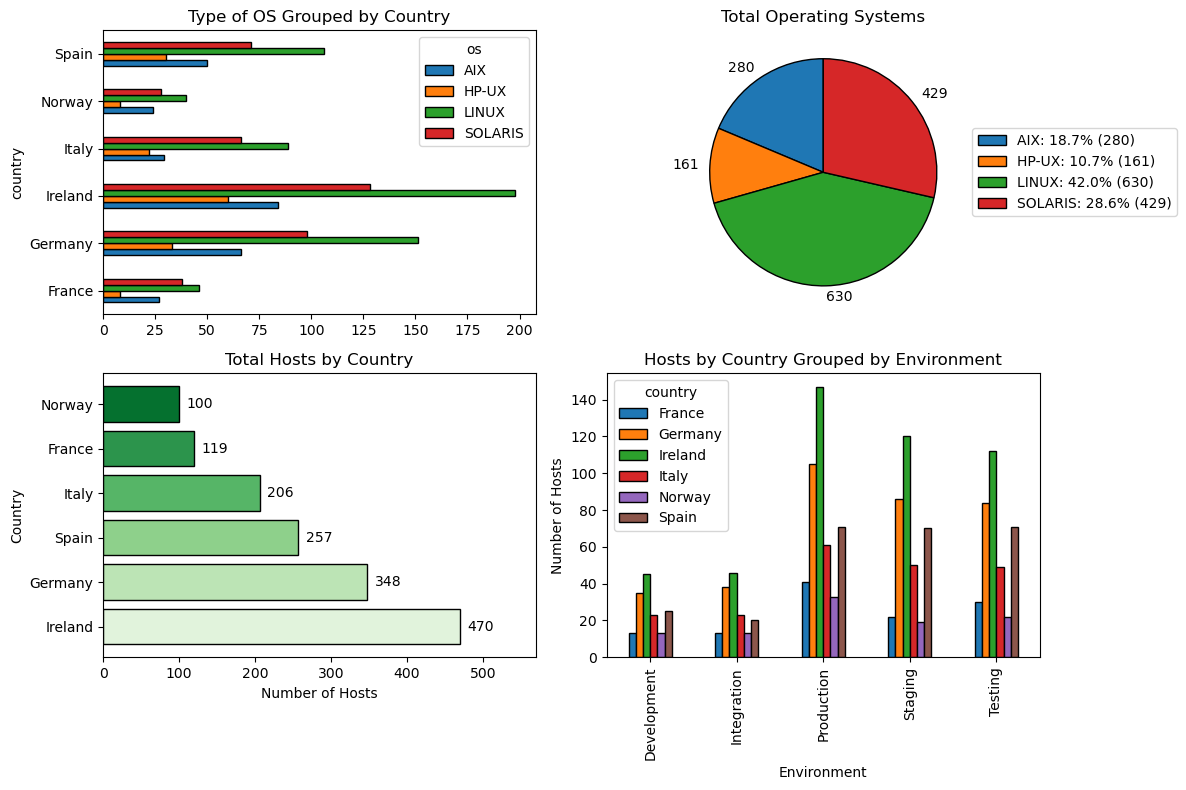

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8)) 

#Graphic_1 - Type of OS Grouped by Country
type_of_OS_grouped_by_country_graphic.unstack().plot(kind ='barh', ax=axs [0,0], edgecolor='black')
axs[0, 0].set_title('Type of OS Grouped by Country')


#Graphic_2 - Total Operating Systems.
ax_pie = total_operating_systems_graphic.plot(
    kind='pie', 
    ax=axs[0, 1],                     
    labels=[f'{count}' for os, count in zip(total_operating_systems_graphic.index,total_operating_systems_graphic.values)],
    legend=True,                      
    startangle=90,                   
    wedgeprops={'edgecolor': 'black'} 
)
axs[0, 1].set_title('Total Operating Systems') 

percentages = total_operating_systems_graphic / total_operating_systems_graphic.sum() * 100
labels_with_percent = [f'{os}: {percent:.1f}% ({count})' for os, count, percent in zip(total_operating_systems_graphic.index,total_operating_systems_graphic.values, percentages)]
axs[0, 1].legend(labels=labels_with_percent, loc='center left', bbox_to_anchor=(1, 0.5))


#Graphic_3 - Total Hosts by Country.
colors = sns.color_palette("Greens", len(total_hosts_by_country_graphic))

axs[1, 0].barh(total_hosts_by_country_graphic.index, total_hosts_by_country_graphic.values, color=colors, edgecolor='black')
axs[1, 0].set_title('Total Hosts by Country') 
axs[1, 0].set_xlabel('Number of Hosts')
axs[1, 0].set_ylabel('Country')

for index, value in enumerate(total_hosts_by_country_graphic.values):
    axs[1, 0].text(value + 10, index, str(value), va='center') 

max_value = total_hosts_by_country_graphic.max() + 100
axs[1, 0].set_xlim(0, max_value) 


#Graphic_4 - Hosts by Country Grouped by Enviroment.
hosts_by_country_grouped_by_enviroment_graphic.plot(kind='bar', ax=axs[1, 1], edgecolor='black')

axs[1, 1].set_title('Hosts by Country Grouped by Environment')
axs[1, 1].set_ylabel('Number of Hosts')
axs[1, 1].set_xlabel('Environment')

plt.tight_layout()
#plt.show()
